## Visualise image-specific class saliency with backpropagation

In [1]:
import matplotlib.pyplot as plt

import torch
import torchvision.models as models

from torchscope.utils import (load_image,
                              apply_transforms,
                              denormalize,
                              normalize,
                              format_for_plotting)

from torchscope.utils import ImageNetIndex

from torchscope.saliency import Backprop

### 1. Load an image 

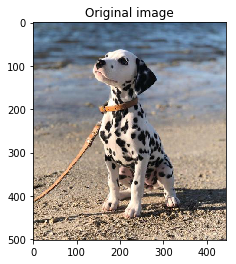

In [2]:
image = load_image('./images/dalmatian_01.jpg')

plt.imshow(image)
plt.title('Original image');

### 2. Load a pre-trained Model

In [3]:
model = models.alexnet(pretrained=True)

### 3. Create an instance of Backprop with the model

In [4]:
backprop = Backprop(model)

### 4. Calculate the gradients of a target class w.r.t the input image

By default, we return the gradients of all the colour channel.

You can also specify to return a max gradients across the colour channel via `take_max=True flag`, as this was what the authors did in the [paper](https://arxiv.org/pdf/1312.6034.pdf) and sometimes it renders better for visualisation.

In [5]:
imagenet = ImageNetIndex()
target_class = imagenet['dalmatian']

input_ = apply_transforms(image)

# Calculate the gradients of each pixel w.r.t. the input image

gradients = backprop.calculate_gradients(input_, target_class)

# Or, take the maximum of the gradients for each pixel across colour channels.

max_gradients = backprop.calculate_gradients(input_, target_class, take_max=True)

print('Shape of the gradients:', gradients.shape)
print('Shape of the max gradients:', max_gradients.shape)

Shape of the gradients: torch.Size([3, 224, 224])
Shape of the max gradients: torch.Size([1, 224, 224])


### 5. Visualise side-by-side

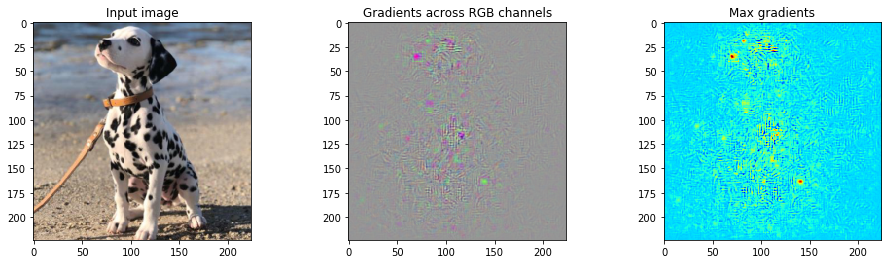

In [6]:
fig = plt.figure(figsize=(16, 4))

input_image = format_for_plotting(denormalize(input_))
ax = fig.add_subplot(1, 3, 1)
ax.imshow(input_image)
ax.set_title('Input image')

formatted_gradients = format_for_plotting(normalize(gradients))
ax = fig.add_subplot(1, 3, 2)
ax.imshow(formatted_gradients)
ax.set_title('Gradients across RGB channels');

formatted_max_gradients = format_for_plotting(normalize(max_gradients))
ax = fig.add_subplot(1, 3, 3)
ax.imshow(formatted_max_gradients, cmap='jet')
ax.set_title('Max gradients');

### 6. Visualise as an overlay

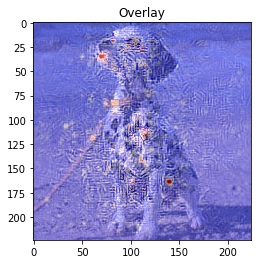

In [7]:
plt.imshow(input_image, cmap='gray')
plt.imshow(formatted_max_gradients, cmap='seismic', alpha=0.6)
plt.title('Overlay');